In [1]:
import numpy as np
import pandas as pd 
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import skew
from scipy.stats import uniform

from scipy import stats
from scipy.stats import norm, skew #for some statistics

from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import Lasso

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv("./train.csv")

In [4]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
df.shape

(1460, 81)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### Handle Missing values

In [7]:
#Print null counts by column
tmp = df.isnull().sum()
tmp

Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

In [8]:
#Now drop the  'Id' colum since it's unnecessary for  the prediction process.
df.drop("Id", axis = 1, inplace = True)

## Data Processing

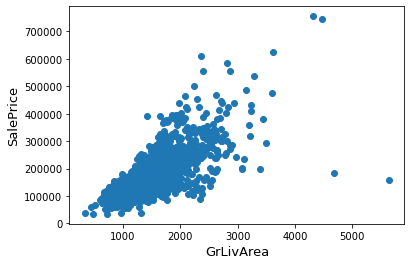

In [9]:
fig, ax = plt.subplots()
ax.scatter(x = df['GrLivArea'], y = df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


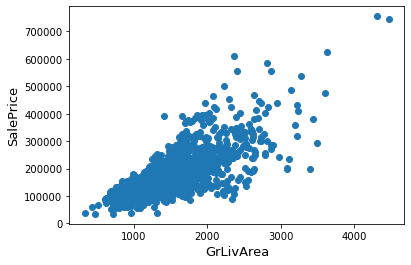

In [10]:
#Deleting outliers
df = df.drop(df[(df['GrLivArea']>4000) & (df['SalePrice']<300000)].index)

#Check the graphic again
fig, ax = plt.subplots()
ax.scatter(df['GrLivArea'], df['SalePrice'])
plt.ylabel('SalePrice', fontsize=13)
plt.xlabel('GrLivArea', fontsize=13)
plt.show()


 mu = 180932.92 and sigma = 79467.79



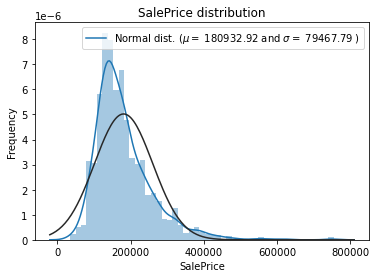

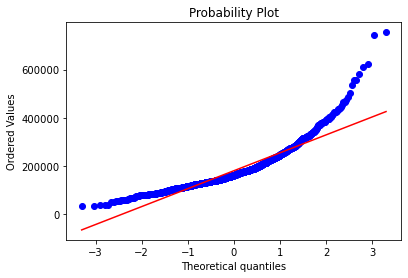

In [11]:
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()


 mu = 12.02 and sigma = 0.40



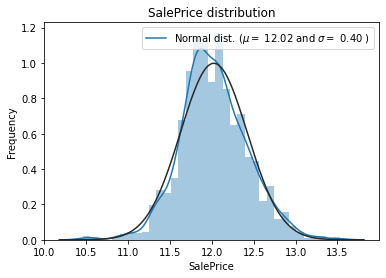

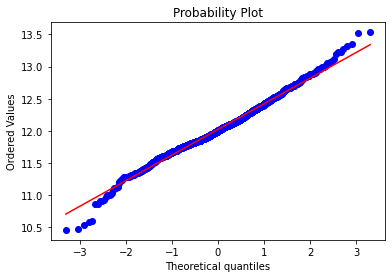

In [12]:
#We use the numpy fuction log1p which  applies log(1+x) to all elements of the column
df["SalePrice"] = np.log1p(df["SalePrice"])

#Check the new distribution 
sns.distplot(df['SalePrice'] , fit=norm);

# Get the fitted parameters used by the function
(mu, sigma) = norm.fit(df['SalePrice'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

#Now plot the distribution
plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SalePrice distribution')

#Get also the QQ-plot
fig = plt.figure()
res = stats.probplot(df['SalePrice'], plot=plt)
plt.show()

### Features engineering


In [13]:
# ntrain = df.shape[0]
# ntest = df_test.shape[0]
# y_train = df_train.SalePrice.values
# all_data = pd.concat((df_train, df_test)).reset_index(drop=True)
# all_data.drop(['SalePrice'], axis=1, inplace=True)
# print("all_data size is : {}".format(all_data.shape))

In [14]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
PoolQC,99.588477
MiscFeature,96.296296
Alley,93.758573
Fence,80.727023
FireplaceQu,47.325103
LotFrontage,17.764060
GarageType,5.555556
GarageYrBlt,5.555556
GarageFinish,5.555556
GarageQual,5.555556


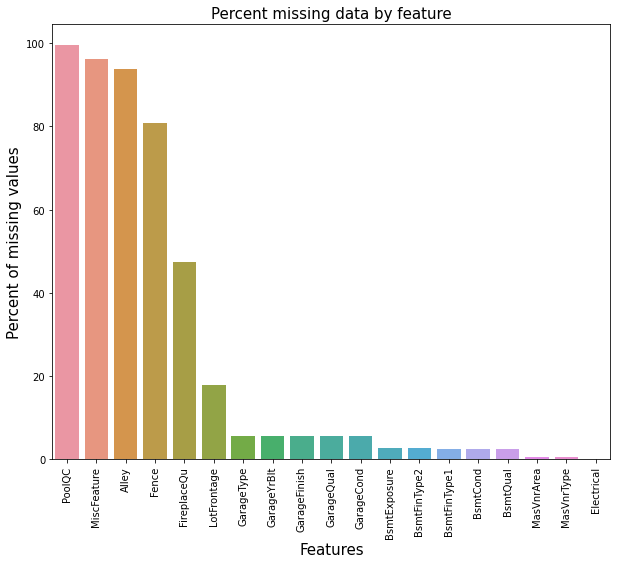

In [15]:
f, ax = plt.subplots(figsize=(10, 8))
plt.xticks(rotation='90')
sns.barplot(x=df_na.index, y=df_na)
plt.xlabel('Features', fontsize=15)
plt.ylabel('Percent of missing values', fontsize=15)
plt.title('Percent missing data by feature', fontsize=15)
plt.show()

### Data Correlation

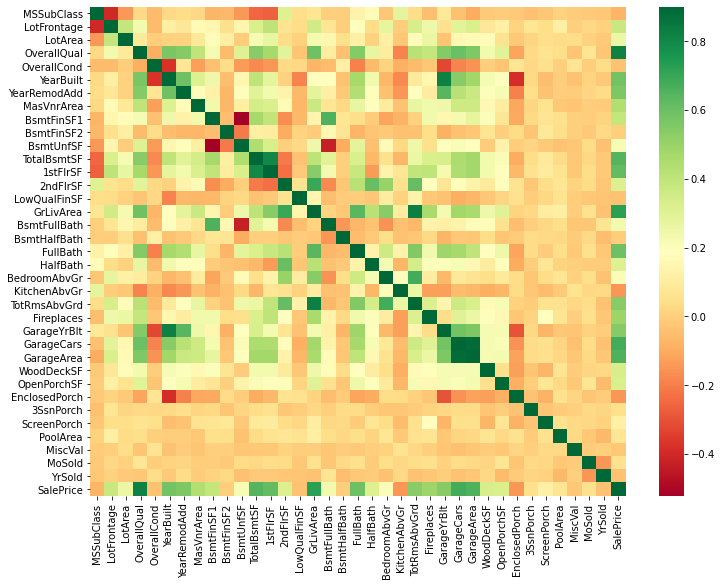

In [16]:
#Correlation map to see how features are correlated with SalePrice
corrmat = df.corr()
plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, vmax=0.9, annot=False,cmap="RdYlGn")
plt.show()

### Missing Value populate

In [17]:
for col in ('PoolQC', 'MiscFeature', 'Alley', 'GarageType', 'Fence', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2'):
    df[col] = df[col].fillna('None')
    

In [18]:
# LotFrontage must be present for all houses, hence going for median
df["LotFrontage"] = df.groupby("Neighborhood")["LotFrontage"].transform(
    lambda x: x.fillna(x.median()))

In [19]:
# 'GarageYrBlt', 'GarageArea' , 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath' can be zero for missing data
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath'):
    df[col] = df[col].fillna(0)
    

In [20]:
# MasVnrType can be none but are is zero incase of missing
df["MasVnrType"] = df["MasVnrType"].fillna("None")
df["MasVnrArea"] = df["MasVnrArea"].fillna(0)

In [21]:
df['Electrical'].value_counts()

SBrkr    1332
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

In [22]:
df['MSZoning'].mode()

0    RL
dtype: object

In [23]:
df['Electrical'] = df['Electrical'].fillna(df['Electrical'].mode()[0])

In [24]:
df['Electrical'].value_counts()

SBrkr    1333
FuseA      94
FuseF      27
FuseP       3
Mix         1
Name: Electrical, dtype: int64

### check missing values again

In [25]:
df_na = (df.isnull().sum() / len(df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio


#### no missing value

In [26]:
# These categorical features are "rank", so they can be transformed to numerical features
df.Alley = df.Alley.map({'NA':0, 'Grvl':1, 'Pave':2})
df.BsmtCond =  df.BsmtCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.BsmtExposure = df.BsmtExposure.map({'NA':0, 'No':1, 'Mn':2, 'Av':3, 'Gd':4})
df['BsmtFinType1'] = df['BsmtFinType1'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df['BsmtFinType2'] = df['BsmtFinType2'].map({'NA':0, 'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6})
df.BsmtQual = df.BsmtQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterCond = df.ExterCond.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.ExterQual = df.ExterQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.FireplaceQu = df.FireplaceQu.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.Functional = df.Functional.map({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8})
df.GarageCond = df.GarageCond.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.GarageQual = df.GarageQual.map({'NA':0, 'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.HeatingQC = df.HeatingQC.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.KitchenQual = df.KitchenQual.map({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5})
df.LandSlope = df.LandSlope.map({'Sev':1, 'Mod':2, 'Gtl':3}) 
df.PavedDrive = df.PavedDrive.map({'N':1, 'P':2, 'Y':3})
df.PoolQC = df.PoolQC.map({'NA':0, 'Fa':1, 'TA':2, 'Gd':3, 'Ex':4})
df.Street = df.Street.map({'Grvl':1, 'Pave':2})
df.Utilities = df.Utilities.map({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4})



In [27]:
# MSSubClass is a category
# df.MSSubClass = df.MSSubClass.map({20:'class1', 30:'class2', 40:'class3', 45:'class4',
#                                    50:'class5', 60:'class6', 70:'class7', 75:'class8',
#                                    80:'class9', 85:'class10', 90:'class11', 120:'class12',
#                                    150:'class13', 160:'class14', 180:'class15', 190:'class16'})

In [28]:
df["MiscFeature"].value_counts()

None    1404
Shed      49
Othr       2
Gar2       2
TenC       1
Name: MiscFeature, dtype: int64

In [29]:
# Maximum are null
df = df.drop('MiscFeature',axis=1)

In [30]:
df["Fence"].value_counts()

None     1177
MnPrv     157
GdPrv      59
GdWo       54
MnWw       11
Name: Fence, dtype: int64

In [31]:
# Maximum are null
df = df.drop('Fence',axis=1)

In [32]:
#keepeing yrSold, not important which month
df = df.drop('MoSold',axis=1)

In [33]:
# converting them into age as year is not mesurable 
df['Age'] = df.YrSold - df.YearBuilt
df['AgeRemod'] = df.YrSold - df.YearRemodAdd
df['AgeGarage'] = df.YrSold - df.GarageYrBlt

In [34]:
df['Age'].describe()

count    1458.000000
mean       36.598080
std        30.240565
min         0.000000
25%         8.000000
50%        35.000000
75%        54.000000
max       136.000000
Name: Age, dtype: float64

In [35]:
df['AgeRemod'].describe()

count    1458.000000
mean       22.982167
std        20.636501
min         0.000000
25%         4.000000
50%        14.000000
75%        41.000000
max        60.000000
Name: AgeRemod, dtype: float64

In [36]:
df['AgeGarage'].describe()

count    1458.000000
mean      139.266804
std       453.996042
min         0.000000
25%         7.000000
50%        30.000000
75%        50.000000
max      2010.000000
Name: AgeGarage, dtype: float64

In [37]:
# drop the original year variables 
df = df.drop(['YrSold','YearBuilt','YearRemodAdd','GarageYrBlt'],axis=1)

In [38]:
# divide the data into numerical ("quan") and categorical ("qual") features
nf = list( df.loc[:,df.dtypes != 'object'].columns.values )
cf = list( df.loc[:,df.dtypes == 'object'].columns.values )

In [39]:
nf

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'Utilities',
 'LandSlope',
 'OverallQual',
 'OverallCond',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'HeatingQC',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'PoolQC',
 'MiscVal',
 'SalePrice',
 'Age',
 'AgeRemod',
 'AgeGarage']

In [40]:
cf

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

In [41]:
nf.remove('SalePrice')

### plot all variables

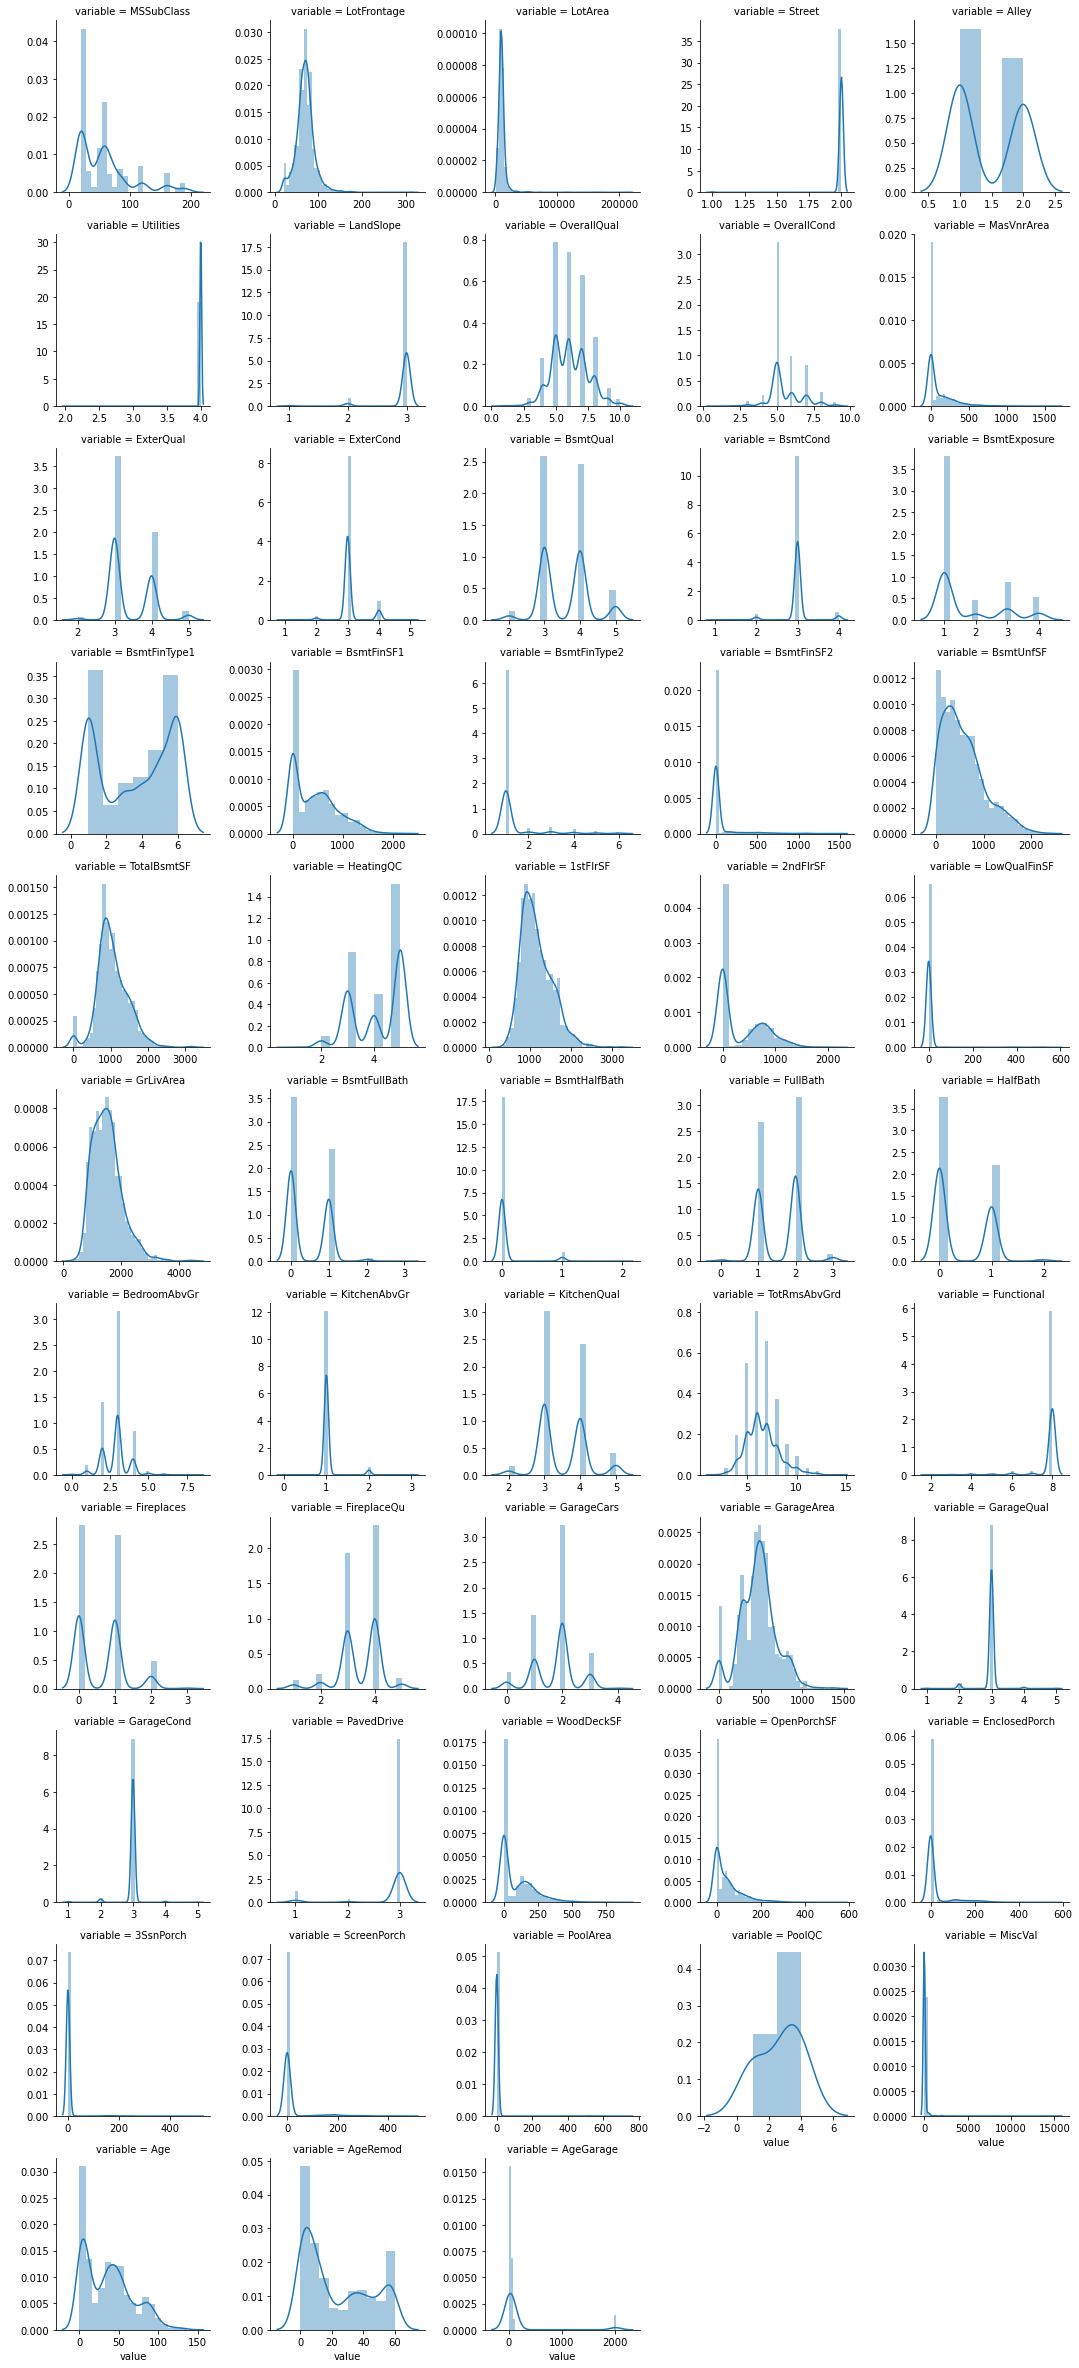

In [42]:
# visualize the distribution of each numerical feature
temp = df.melt(id_vars=['SalePrice'], value_vars= nf )
grid = sns.FacetGrid(temp, col="variable",  col_wrap=5 , size=3.0, 
                     aspect=1.0,sharex=False, sharey=False)
grid.map(sns.distplot, "value")
plt.show()

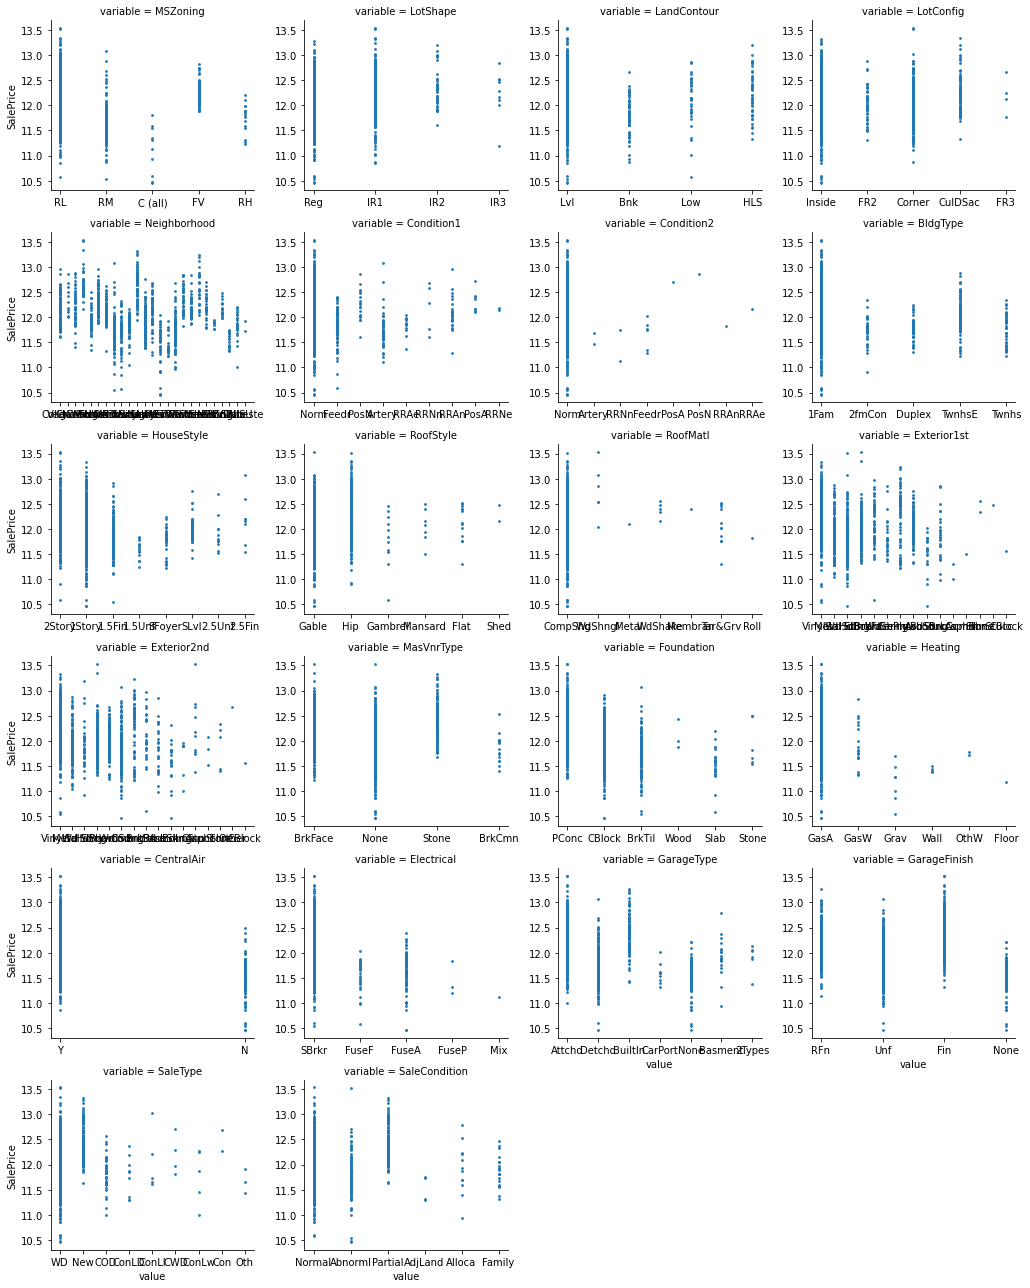

In [43]:
# scatter plots
temp = pd.melt(df, id_vars=['SalePrice'],value_vars=cf)
grid = sns.FacetGrid(temp, col="variable",  col_wrap=4 , size=3.0, 
                     aspect=1.2,sharex=False, sharey=False)
grid.map(plt.scatter, "value",'SalePrice', s=3)
plt.show()

# Skewed features

In [44]:
# Check the skew of all numerical features
skewed_feats = df[nf].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("\nSkew in numerical features: \n")
skewness = pd.DataFrame({'Skew' :skewed_feats})
skewness.head(10)


Skew in numerical features: 



,Skew
MiscVal,24.434913
PoolArea,15.932532
LotArea,12.560986
3SsnPorch,10.286510
LowQualFinSF,8.995688
KitchenAbvGr,4.480268
BsmtFinSF2,4.247550
ScreenPorch,4.114690
BsmtHalfBath,4.095895
AgeGarage,3.862350


In [45]:
high_skew = skewed_feats[skewed_feats > 0.5]
skew_index = high_skew.index
skew_index

Index(['MiscVal', 'PoolArea', 'LotArea', '3SsnPorch', 'LowQualFinSF',
       'KitchenAbvGr', 'BsmtFinSF2', 'ScreenPorch', 'BsmtHalfBath',
       'AgeGarage', 'BsmtFinType2', 'EnclosedPorch', 'MasVnrArea',
       'OpenPorchSF', 'LotFrontage', 'WoodDeckSF', 'MSSubClass', 'ExterCond',
       'BsmtExposure', 'GrLivArea', 'BsmtUnfSF', '1stFlrSF', 'ExterQual',
       '2ndFlrSF', 'BsmtFinSF1', 'OverallCond', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'Age', 'BsmtFullBath', 'TotalBsmtSF', 'AgeRemod'],
      dtype='object')

In [46]:
len(skew_index)

33

In [47]:
#Transforming the X- Feature (Log tranformation)
num_data = df[list( df.loc[:,df.dtypes != 'object'].columns.values )]
for i in skew_index:
    num_data[i] = np.log1p(num_data[i])

In [48]:
num_data.apply(lambda x: skew(x)).sort_values(ascending=False)

PoolArea         15.501716
3SsnPorch         7.721468
LowQualFinSF      7.447271
MiscVal           5.161462
BsmtHalfBath      3.925827
KitchenAbvGr      3.862290
ScreenPorch       3.144400
BsmtFinSF2        2.518628
EnclosedPorch     2.107795
HalfBath          0.569489
ExterQual         0.554027
MasVnrArea        0.505791
AgeGarage         0.493021
BsmtFullBath      0.418978
KitchenQual       0.383781
ExterCond         0.347005
2ndFlrSF          0.292482
MSSubClass        0.250304
BedroomAbvGr      0.212107
OverallQual       0.200579
Fireplaces        0.178679
WoodDeckSF        0.156353
GarageArea        0.131612
SalePrice         0.121455
FullBath          0.031239
1stFlrSF          0.006976
OpenPorchSF      -0.022866
TotRmsAbvGrd     -0.070108
GrLivArea        -0.070939
LotArea          -0.181091
OverallCond      -0.255451
GarageCars       -0.342025
HeatingQC        -0.537719
AgeRemod         -0.570894
BsmtFinSF1       -0.617460
Age              -0.843757
LotFrontage      -0.998456
B

In [49]:
num_data

,MSSubClass,LotFrontage,LotArea,Street,Alley,Utilities,LandSlope,OverallQual,OverallCond,MasVnrArea,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,MiscVal,SalePrice,Age,AgeRemod,AgeGarage
0,4.110874,4.189655,9.042040,2,NaN,4,3,7,1.791759,5.283204,...,0.000000,0.0,0.0,0.0,NaN,0.000000,12.247699,1.791759,1.791759,1.791759
1,3.044522,4.394449,9.169623,2,NaN,4,3,6,2.197225,0.000000,...,0.000000,0.0,0.0,0.0,NaN,0.000000,12.109016,3.465736,3.465736,3.465736
2,4.110874,4.234107,9.328212,2,NaN,4,3,7,1.791759,5.093750,...,0.000000,0.0,0.0,0.0,NaN,0.000000,12.317171,2.079442,1.945910,2.079442
3,4.262680,4.110874,9.164401,2,NaN,4,3,7,1.791759,0.000000,...,5.609472,0.0,0.0,0.0,NaN,0.000000,11.849405,4.521789,3.610918,2.197225
4,4.110874,4.442651,9.565284,2,NaN,4,3,8,1.791759,5.860786,...,0.000000,0.0,0.0,0.0,NaN,0.000000,12.429220,2.197225,2.197225,2.197225
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,4.110874,4.143135,8.976894,2,NaN,4,3,6,1.791759,0.000000,...,0.000000,0.0,0.0,0.0,NaN,0.000000,12.072547,2.197225,2.079442,2.197225
1456,3.044522,4.454347,9.486152,2,NaN,4,3,6,1.945910,4.787492,...,0.000000,0.0,0.0,0.0,NaN,0.000000,12.254868,3.496508,3.135494,3.496508
1457,4.262680,4.204693,9.109746,2,NaN,4,3,7,2.302585,0.000000,...,0.000000,0.0,0.0,0.0,NaN,7.824446,12.493133,4.248495,1.609438,4.248495
1458,3.044522,4.234107,9.181735,2,NaN,4,3,5,1.945910,0.000000,...,4.727388,0.0,0.0,0.0,NaN,0.000000,11.864469,4.110874,2.708050,4.110874


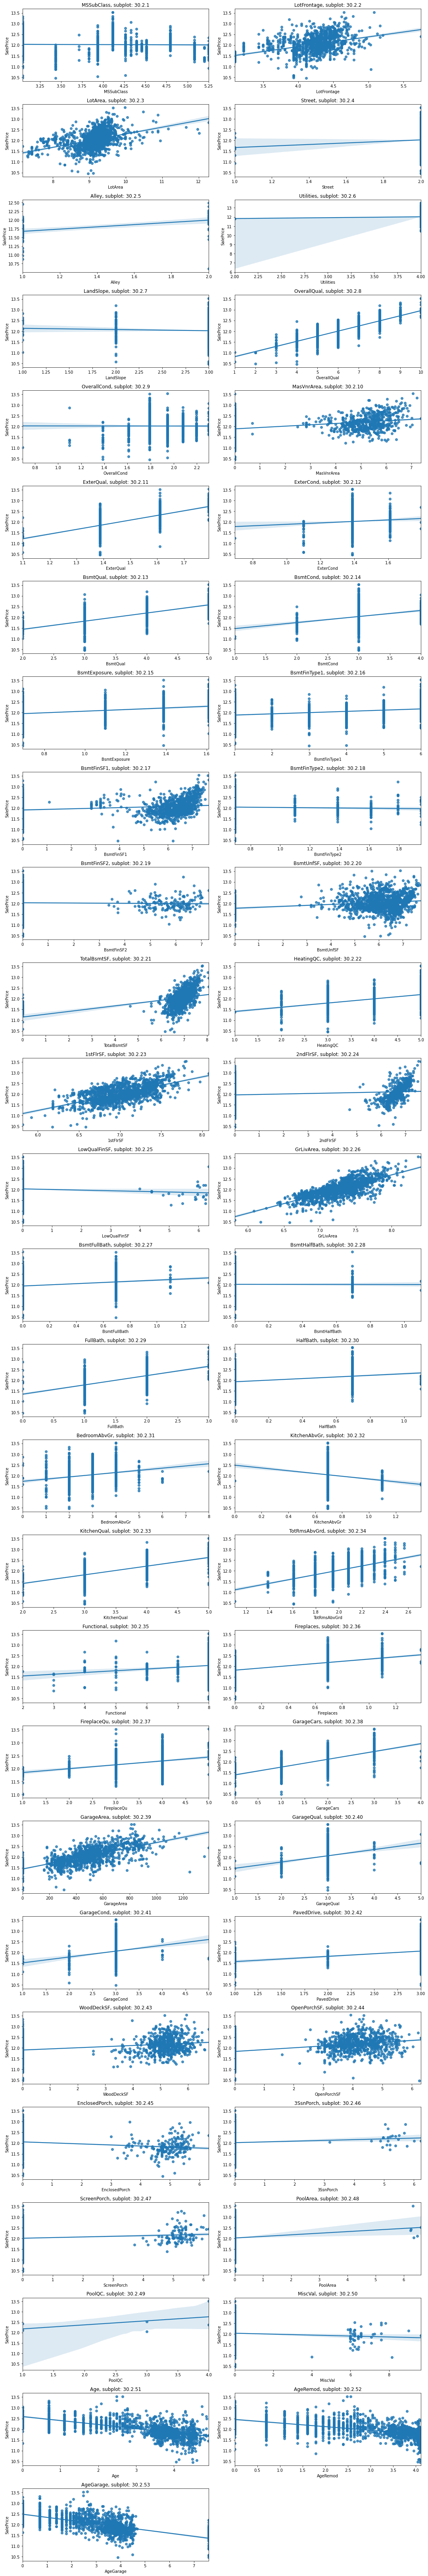

In [50]:
a = 30
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in nf:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}.{}.{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.regplot(num_data[i], num_data['SalePrice'])
    c = c + 1

plt.tight_layout()
plt.show();

### Drop the columns that are not strongly correlated. Threshold corr value 0.3

In [51]:
num_corr_data = num_data.corr()
top_corr_num_col = num_corr_data.index[abs(num_corr_data['SalePrice'])>0.3]
top_corr_num_col

Index(['LotFrontage', 'LotArea', 'Alley', 'OverallQual', 'MasVnrArea',
       'ExterQual', 'BsmtQual', 'BsmtExposure', 'TotalBsmtSF', 'HeatingQC',
       '1stFlrSF', 'GrLivArea', 'FullBath', 'HalfBath', 'KitchenQual',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'PoolQC', 'SalePrice', 'Age',
       'AgeRemod', 'AgeGarage'],
      dtype='object')

In [52]:
num_data_f = num_data[top_corr_num_col]
num_data_f.shape

(1458, 28)

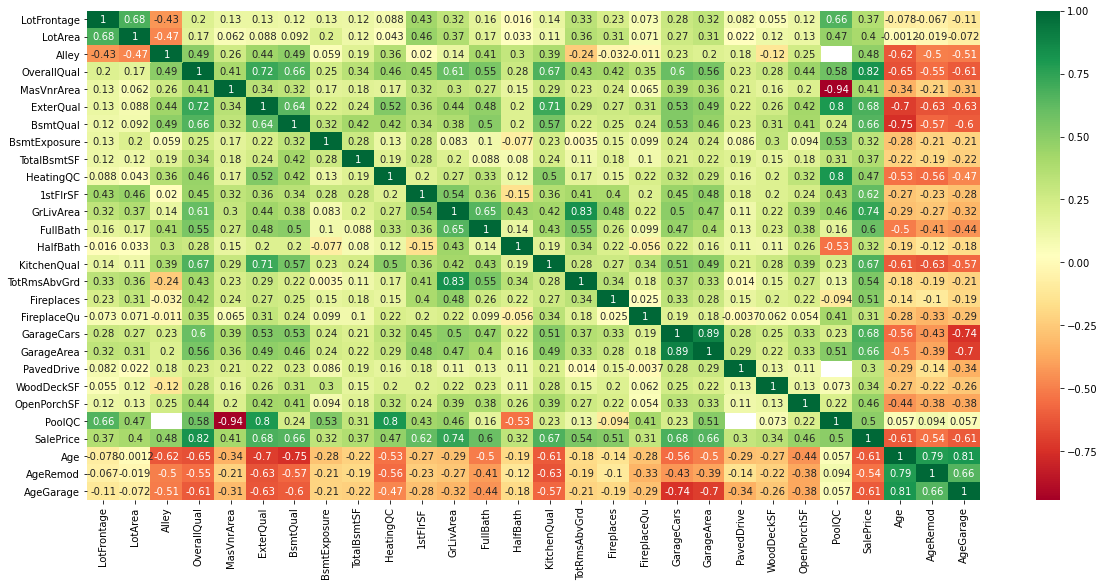

In [53]:
plt.subplots(figsize=(20,9))
sns.heatmap(num_data_f[top_corr_num_col].corr(), annot=True,cmap="RdYlGn")
plt.show()

### categorical features

In [54]:
cat_df = df[cf]
cat_df.shape

(1458, 22)

In [55]:
cat_df.isnull().sum().sort_values(ascending=False)[:20]

MSZoning        0
LotShape        0
SaleType        0
GarageFinish    0
GarageType      0
Electrical      0
CentralAir      0
Heating         0
Foundation      0
MasVnrType      0
Exterior2nd     0
Exterior1st     0
RoofMatl        0
RoofStyle       0
HouseStyle      0
BldgType        0
Condition2      0
Condition1      0
Neighborhood    0
LotConfig       0
dtype: int64

#### no null values

In [56]:
df_na = (cat_df.isnull().sum() / len(cat_df)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio


In [57]:
# Adding Target variable "SalePrice"
cat_df = pd.concat([cat_df,num_data_f[['SalePrice']]],axis=1)
cat_df.head()

,MSZoning,LotShape,LandContour,LotConfig,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,...,MasVnrType,Foundation,Heating,CentralAir,Electrical,GarageType,GarageFinish,SaleType,SaleCondition,SalePrice
0,RL,Reg,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,WD,Normal,12.247699
1,RL,Reg,Lvl,FR2,Veenker,Feedr,Norm,1Fam,1Story,Gable,...,None,CBlock,GasA,Y,SBrkr,Attchd,RFn,WD,Normal,12.109016
2,RL,IR1,Lvl,Inside,CollgCr,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,WD,Normal,12.317171
3,RL,IR1,Lvl,Corner,Crawfor,Norm,Norm,1Fam,2Story,Gable,...,None,BrkTil,GasA,Y,SBrkr,Detchd,Unf,WD,Abnorml,11.849405
4,RL,IR1,Lvl,FR2,NoRidge,Norm,Norm,1Fam,2Story,Gable,...,BrkFace,PConc,GasA,Y,SBrkr,Attchd,RFn,WD,Normal,12.429220


In [58]:
cf

['MSZoning',
 'LotShape',
 'LandContour',
 'LotConfig',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'Foundation',
 'Heating',
 'CentralAir',
 'Electrical',
 'GarageType',
 'GarageFinish',
 'SaleType',
 'SaleCondition']

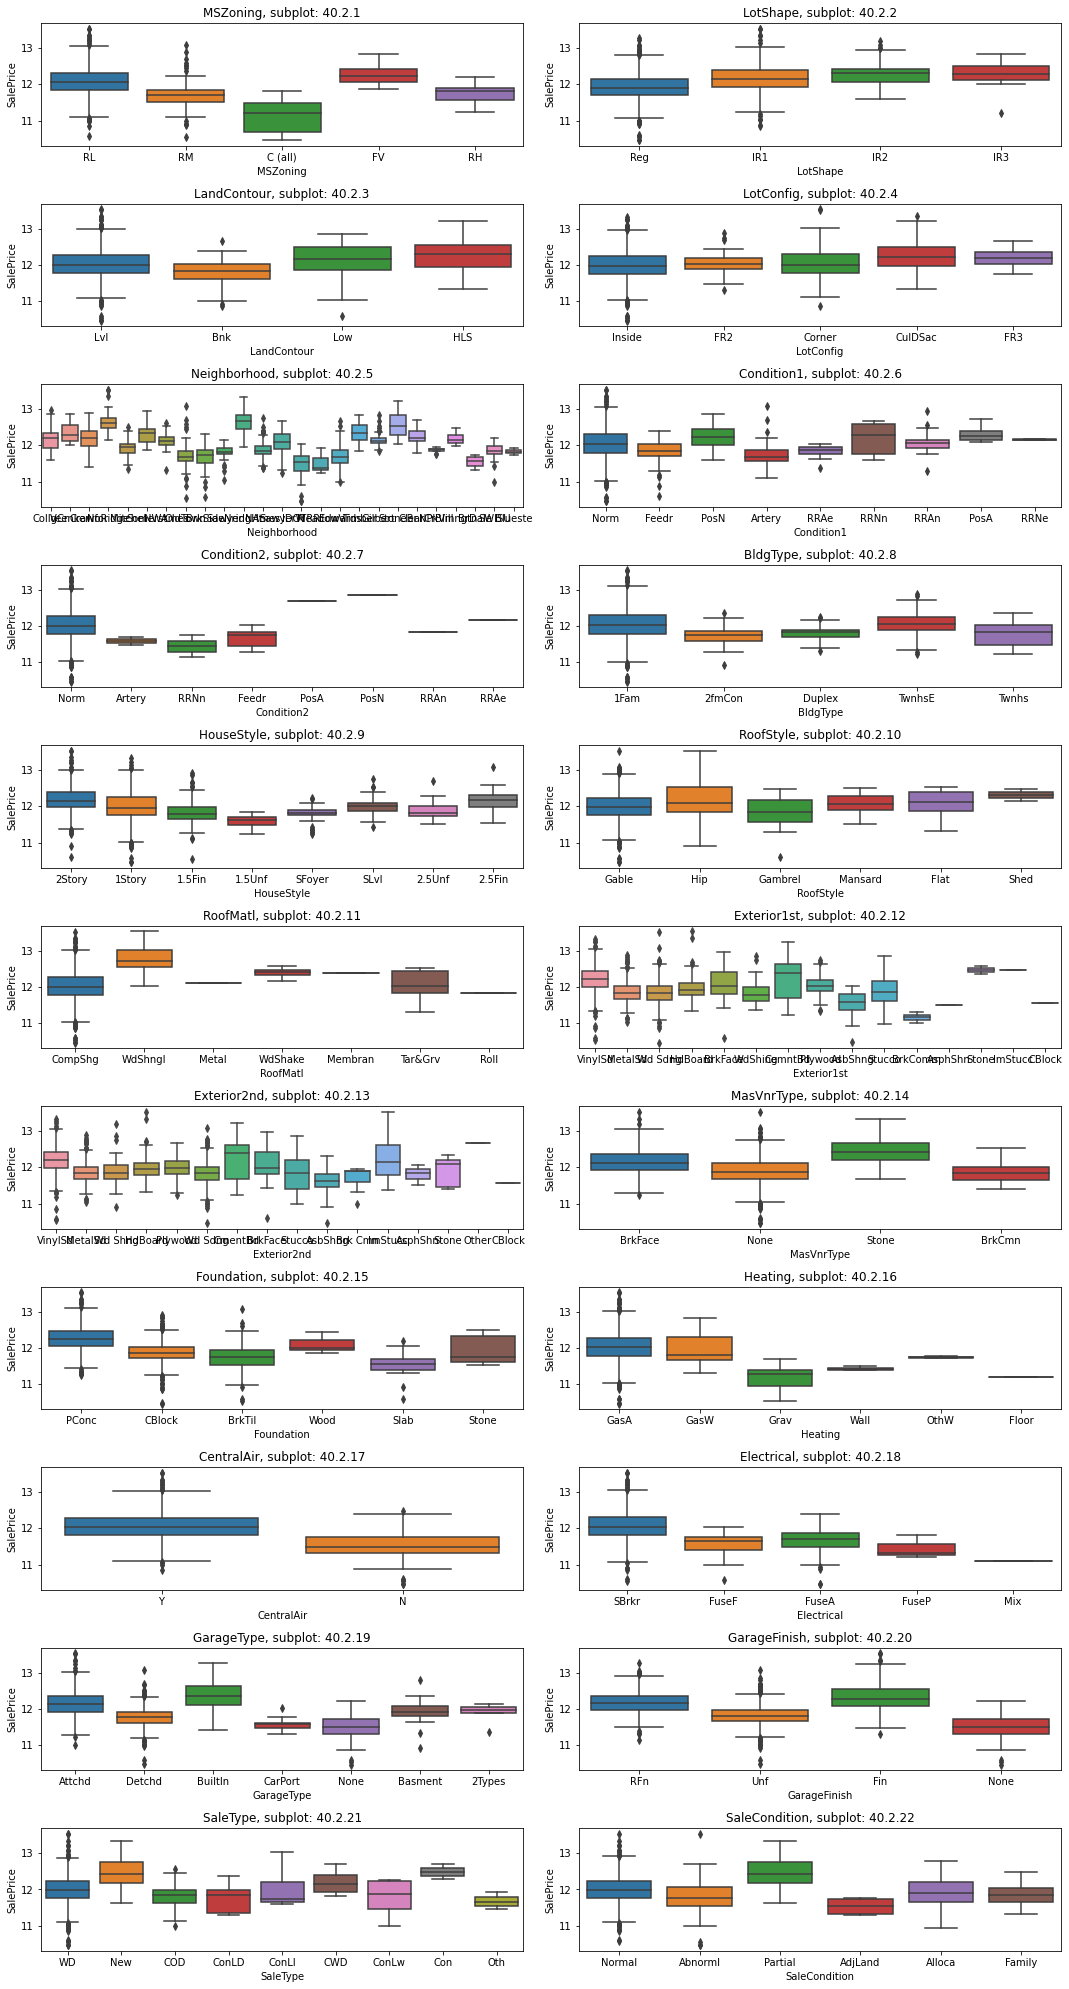

In [59]:
a = 40
b = 2
c = 1

fig = plt.figure(figsize=(50,40))
fig.set_size_inches(15, 100)

for i in cf:
    plt.subplot(a, b, c)
    plt.title('{}, subplot: {}.{}.{}'.format(i, a, b, c))
    plt.xlabel(i)
    sns.boxplot(cat_df[i], cat_df['SalePrice'])
    c = c + 1

plt.tight_layout()
plt.show();

In [60]:
cat_df.drop("SalePrice", axis = 1, inplace = True)

## One hot Encoding - Encoding Categorical Features

In [61]:
cat_df = pd.get_dummies(cat_df)

In [62]:
cat_df.shape

(1458, 166)

In [63]:
num_data_f["BsmtQual"].value_counts()

3.0    649
4.0    618
5.0    119
2.0     35
Name: BsmtQual, dtype: int64

In [64]:
df_f = pd.concat([cat_df,num_data_f],axis=1)
df_f.shape

(1458, 194)

In [65]:
df_na = (df_f.isnull().sum() / len(df_f)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)


,Missing Ratio
PoolQC,99.588477
Alley,93.758573
FireplaceQu,47.325103
BsmtExposure,2.606310
BsmtQual,2.537723


In [66]:
# variable containing the columns that we want to remove
miss_data_col = ['Alley','PoolQC', 'FireplaceQu']
df_f = df_f.drop(miss_data_col,axis=1)
df_f.shape

(1458, 191)

In [67]:
df_na = (df_f.isnull().sum() / len(df_f)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio
BsmtExposure,2.606310
BsmtQual,2.537723


In [68]:
df_f['BsmtExposure'] = df_f['BsmtExposure'].fillna(0)
df_f['BsmtQual']     = df_f['BsmtQual'].fillna(0)

In [69]:
df_na = (df_f.isnull().sum() / len(df_f)) * 100
df_na = df_na.drop(df_na[df_na == 0].index).sort_values(ascending=False)[:30]
missing_data = pd.DataFrame({'Missing Ratio' :df_na})
missing_data.head(20)

,Missing Ratio


### get X and y

In [70]:
X = df_f.drop('SalePrice',axis =1)
y = df_f.pop('SalePrice')
print('X shape',X.shape)
print('y shape',y.shape)

X shape (1458, 190)
y shape (1458,)


### Train Test Split

In [71]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state =1)

In [72]:
print('X train shape',X_train.shape)
print('X test shape',X_test.shape)
print('y train shape',y_train.shape)
print('y test shape',y_test.shape)

X train shape (1020, 190)
X test shape (438, 190)
y train shape (1020,)
y test shape (438,)


## Ridge Regression

In [73]:
lm_ridge = Ridge()

parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}
lm_ridge_grd = GridSearchCV(estimator = lm_ridge, param_grid=parameters)

lm_ridge_grd.fit(X_train,y_train)

print("The best value of Alpha is: ",lm_ridge_grd.best_params_,lm_ridge_grd.best_score_)

The best value of Alpha is:  {'alpha': 1} 0.8949890762098406


In [74]:
lm_ridge_best_gcv = lm_ridge_grd.best_estimator_
lm_ridge_best_gcv

Ridge(alpha=1)

In [75]:
lm_ridge_best_gcv.fit(X_train,y_train)

Ridge(alpha=1)

In [76]:
# Prediction
y_pred_train_ridge_gcv = lm_ridge_best_gcv.predict(X_train)
y_pred_test_ridge_gcv =  lm_ridge_best_gcv.predict(X_test)

In [77]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_ridge_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_ridge_gcv)))) 

Root Mean Square Error train = 0.10365507744059871
Root Mean Square Error test = 0.13891055579190173


In [89]:
# ridge model parameters
model_parameters = list(lm_ridge_best_gcv.coef_)
model_parameters.insert(0, lm_ridge_best_gcv.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 7.294),
 ('MSZoning_C (all)', -0.315),
 ('MSZoning_FV', 0.129),
 ('MSZoning_RH', 0.091),
 ('MSZoning_RL', 0.061),
 ('MSZoning_RM', 0.034),
 ('LotShape_IR1', -0.017),
 ('LotShape_IR2', -0.003),
 ('LotShape_IR3', 0.04),
 ('LotShape_Reg', -0.019),
 ('LandContour_Bnk', 0.012),
 ('LandContour_HLS', 0.013),
 ('LandContour_Low', -0.043),
 ('LandContour_Lvl', 0.018),
 ('LotConfig_Corner', 0.019),
 ('LotConfig_CulDSac', 0.049),
 ('LotConfig_FR2', -0.039),
 ('LotConfig_FR3', -0.044),
 ('LotConfig_Inside', 0.015),
 ('Neighborhood_Blmngtn', -0.005),
 ('Neighborhood_Blueste', 0.015),
 ('Neighborhood_BrDale', 0.013),
 ('Neighborhood_BrkSide', 0.031),
 ('Neighborhood_ClearCr', 0.027),
 ('Neighborhood_CollgCr', -0.019),
 ('Neighborhood_Crawfor', 0.095),
 ('Neighborhood_Edwards', -0.06),
 ('Neighborhood_Gilbert', -0.059),
 ('Neighborhood_IDOTRR', -0.091),
 ('Neighborhood_MeadowV', -0.079),
 ('Neighborhood_Mitchel', -0.012),
 ('Neighborhood_NAmes', -0.045),
 ('Neighborhood_NPkVill', 0.129)

In [92]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], axis = 0, ascending = False)
res.head(20)

,Variable,Coeff
0,constant,7.490
177,GrLivArea,0.268
176,1stFlrSF,0.100
25,Neighborhood_Crawfor,0.089
168,LotArea,0.086
90,Exterior1st_BrkFace,0.077
169,OverallQual,0.073
34,Neighborhood_NoRidge,0.064
173,BsmtExposure,0.059
41,Neighborhood_StoneBr,0.053


In [98]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

,Variable,Coeff
0,constant,7.490
177,GrLivArea,0.268
176,1stFlrSF,0.100
25,Neighborhood_Crawfor,0.089
168,LotArea,0.086
...,...,...
28,Neighborhood_IDOTRR,-0.043
122,Foundation_BrkTil,-0.050
134,CentralAir_N,-0.071
161,SaleCondition_Abnorml,-0.072


In [99]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

,Variable,Coeff
0,constant,7.490
177,GrLivArea,0.268
176,1stFlrSF,0.100
25,Neighborhood_Crawfor,0.089
168,LotArea,0.086
90,Exterior1st_BrkFace,0.077
169,OverallQual,0.073
34,Neighborhood_NoRidge,0.064
173,BsmtExposure,0.059
41,Neighborhood_StoneBr,0.053


In [100]:
Ridge_var = list(predRFE['Variable'])
print(Ridge_var)

['constant', 'GrLivArea', '1stFlrSF', 'Neighborhood_Crawfor', 'LotArea', 'Exterior1st_BrkFace', 'OverallQual', 'Neighborhood_NoRidge', 'BsmtExposure', 'Neighborhood_StoneBr', 'KitchenQual', 'Fireplaces', 'Neighborhood_BrkSide', 'Neighborhood_NridgHt', 'BsmtQual', 'HalfBath', 'LotConfig_CulDSac', 'Condition1_Norm', 'HeatingQC', 'GarageCars', 'Electrical_SBrkr', 'GarageFinish_Fin', 'Exterior2nd_MetalSd', 'PavedDrive', 'BldgType_1Fam', 'FullBath', 'GarageType_Attchd', 'MSZoning_FV', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'TotalBsmtSF', 'LandContour_Lvl', 'MasVnrArea', 'Exterior1st_Wd Sdng', 'LotConfig_FR2', 'HouseStyle_1.5Fin', 'Exterior1st_VinylSd', 'Neighborhood_NAmes', 'LotShape_Reg', 'Exterior2nd_VinylSd', 'Neighborhood_Edwards', 'Condition1_Artery', 'Neighborhood_Gilbert', 'AgeRemod', 'RoofStyle_Gable', 'Neighborhood_OldTown', 'MSZoning_RM', 'Neighborhood_IDOTRR', 'Foundation_BrkTil', 'CentralAir_N', 'SaleCondition_Abnorml', 'MSZoning_C (all)']


## LASSO

In [78]:
lm_lasso =Lasso()
parameters= {'alpha':[x for x in [0.0005,0.001,0.01,0.1,0.2,0.4,0.5,0.7,0.8,1]]}

In [79]:
lm_lasso_grd = GridSearchCV(estimator=lm_lasso, 
                            param_grid=parameters)

In [80]:
lm_lasso_grd.fit(X_train,y_train)

print("The best value of Alpha is: ",lm_lasso_grd.best_params_,lm_lasso_grd.best_score_)

The best value of Alpha is:  {'alpha': 0.001} 0.9040406672682147


In [81]:
lm_lasso_best_gcv = lm_lasso_grd.best_estimator_
lm_lasso_best_gcv

Lasso(alpha=0.001)

In [82]:
lm_lasso_best_gcv.fit(X_train,y_train)

Lasso(alpha=0.001)

In [84]:
# Prediction
y_pred_train_lasso_gcv = lm_lasso_best_gcv.predict(X_train)
y_pred_test_lasso_gcv =  lm_lasso_best_gcv.predict(X_test)

In [85]:
print('Root Mean Square Error train = ' + str(np.sqrt(mean_squared_error(y_train, y_pred_train_lasso_gcv))))
print('Root Mean Square Error test = ' + str(np.sqrt(mean_squared_error(y_test, y_pred_test_lasso_gcv))))

Root Mean Square Error train = 0.11541513690897955
Root Mean Square Error test = 0.13624268797702974


In [86]:
print("R-Square for training data",lm_lasso_best_gcv.score(X_train,y_train)) 
print("R-Square for test data",lm_lasso_best_gcv.score(X_test,y_test))

R-Square for training data 0.9180354522539844
R-Square for test data 0.8785227784435167


In [90]:
# lasso model parameters
model_parameters = list(lm_lasso_best_gcv.coef_ )
model_parameters.insert(0, lm_lasso_best_gcv.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 7.49),
 ('MSZoning_C (all)', -0.251),
 ('MSZoning_FV', 0.006),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.0),
 ('MSZoning_RM', -0.042),
 ('LotShape_IR1', 0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', 0.0),
 ('LotShape_Reg', -0.01),
 ('LandContour_Bnk', -0.0),
 ('LandContour_HLS', -0.0),
 ('LandContour_Low', -0.0),
 ('LandContour_Lvl', 0.002),
 ('LotConfig_Corner', 0.0),
 ('LotConfig_CulDSac', 0.025),
 ('LotConfig_FR2', -0.001),
 ('LotConfig_FR3', -0.0),
 ('LotConfig_Inside', 0.0),
 ('Neighborhood_Blmngtn', -0.0),
 ('Neighborhood_Blueste', 0.0),
 ('Neighborhood_BrDale', 0.0),
 ('Neighborhood_BrkSide', 0.04),
 ('Neighborhood_ClearCr', 0.0),
 ('Neighborhood_CollgCr', -0.0),
 ('Neighborhood_Crawfor', 0.089),
 ('Neighborhood_Edwards', -0.013),
 ('Neighborhood_Gilbert', -0.018),
 ('Neighborhood_IDOTRR', -0.043),
 ('Neighborhood_MeadowV', -0.0),
 ('Neighborhood_Mitchel', -0.0),
 ('Neighborhood_NAmes', -0.007),
 ('Neighborhood_NPkVill', 0.0),
 ('Neighborhood_NWAmes', -0.0),
 ('N

In [95]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']

para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para.head(10)

,Variable,Coeff
0,constant,7.490
177,GrLivArea,0.268
176,1stFlrSF,0.100
25,Neighborhood_Crawfor,0.089
168,LotArea,0.086
90,Exterior1st_BrkFace,0.077
169,OverallQual,0.073
34,Neighborhood_NoRidge,0.064
173,BsmtExposure,0.059
41,Neighborhood_StoneBr,0.053


In [96]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

,Variable,Coeff
0,constant,7.490
177,GrLivArea,0.268
176,1stFlrSF,0.100
25,Neighborhood_Crawfor,0.089
168,LotArea,0.086
90,Exterior1st_BrkFace,0.077
169,OverallQual,0.073
34,Neighborhood_NoRidge,0.064
173,BsmtExposure,0.059
41,Neighborhood_StoneBr,0.053


In [97]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'GrLivArea', '1stFlrSF', 'Neighborhood_Crawfor', 'LotArea', 'Exterior1st_BrkFace', 'OverallQual', 'Neighborhood_NoRidge', 'BsmtExposure', 'Neighborhood_StoneBr', 'KitchenQual', 'Fireplaces', 'Neighborhood_BrkSide', 'Neighborhood_NridgHt', 'BsmtQual', 'HalfBath', 'LotConfig_CulDSac', 'Condition1_Norm', 'HeatingQC', 'GarageCars', 'Electrical_SBrkr', 'GarageFinish_Fin', 'Exterior2nd_MetalSd', 'PavedDrive', 'BldgType_1Fam', 'FullBath', 'GarageType_Attchd', 'MSZoning_FV', 'OpenPorchSF', 'WoodDeckSF', 'LotFrontage', 'TotalBsmtSF', 'LandContour_Lvl', 'MasVnrArea', 'Exterior1st_Wd Sdng', 'LotConfig_FR2', 'HouseStyle_1.5Fin', 'Exterior1st_VinylSd', 'Neighborhood_NAmes', 'LotShape_Reg', 'Exterior2nd_VinylSd', 'Neighborhood_Edwards', 'Condition1_Artery', 'Neighborhood_Gilbert', 'AgeRemod', 'RoofStyle_Gable', 'Neighborhood_OldTown', 'MSZoning_RM', 'Neighborhood_IDOTRR', 'Foundation_BrkTil', 'CentralAir_N', 'SaleCondition_Abnorml', 'MSZoning_C (all)']
